In [1]:
# Common imports
import numpy as np
import pandas as pd

In [2]:
# On Kaggle Notebook, after adding the data, you can import the data as Pandas DataFrame as follows
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [3]:
# Listing all attributes with their row count
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
#Printing some details about the dataset's attributes
display(df.describe())
df.info()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
id                   5110 non-null int64
gender               5110 non-null object
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null object
work_type            5110 non-null object
Residence_type       5110 non-null object
avg_glucose_level    5110 non-null float64
bmi                  4909 non-null float64
smoking_status       5110 non-null object
stroke               5110 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 479.1+ KB


In [5]:
# creating correlation matrix between attributes
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1,0.00353807,0.00354961,-0.00129594,0.00109236,0.003084,0.00638817
age,0.00353807,1,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.00354961,0.276398,1,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.00129594,0.263796,0.108306,1,0.161857,0.0413574,0.134914
avg_glucose_level,0.00109236,0.238171,0.174474,0.161857,1,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.0413574,0.175502,1,0.0423737
stroke,0.00638817,0.245257,0.127904,0.134914,0.131945,0.0423737,1


In [6]:
# filling missing values with 0
df["bmi"].fillna(0, inplace=True)

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_df=LabelEncoder()
df['gender']=labelencoder_df.fit_transform(df['gender'])
df['ever_married']=labelencoder_df.fit_transform(df['ever_married'])
df['work_type']=labelencoder_df.fit_transform(df['work_type'])
df['Residence_type']=labelencoder_df.fit_transform(df['Residence_type'])
df['smoking_status']=labelencoder_df.fit_transform(df['smoking_status'])

In [8]:
onehotencoder = OneHotEncoder(handle_unknown='ignore')
enc_df=pd.DataFrame(onehotencoder.fit_transform(df[['work_type']]).toarray())
enc_df_2=pd.DataFrame(onehotencoder.fit_transform(df[['smoking_status']]).toarray())

In [9]:
#merge with main df bridge_df on key values
from sklearn.utils import shuffle
df = df.join(enc_df)
d = {0: 'govt_job_work', 1: 'never_worked_work', 2: 'private_work', 3: 'self_employed_work', 4: 'children_work'}
df=df.rename(columns=d)
df = df.join(enc_df_2)
p = {0: 'unknown_smoke', 1: 'formerly smoked_smoke', 2: 'never smoked_smoke', 3: 'smokes_smoke'}
df=df.rename(columns=p)
df = shuffle(df)

In [10]:
df.drop(['work_type'], axis=1, inplace=True)
df.drop(['smoking_status'], axis=1, inplace=True)

In [11]:
y=df['stroke']
df.drop(['stroke'], axis=1, inplace=True)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(df,y, test_size=0.2, random_state=0)

# LOGISTIC REGRESSION

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def logreg_model(X_train, y_train,X_test, y_test):
  ## Create a model
  log_reg = LogisticRegression(solver='lbfgs',max_iter=200)
  log_scores = cross_val_score(log_reg, X_train, y_train,n_jobs =-1, cv=20)
  print("Cross Validation score:", log_scores.mean())
  log_reg.fit(X_train, y_train)
  ## predict target class based on the trained model 
  predictions = log_reg.predict(X_test)

  ## Calculate the performance of the classifier
  accuracy = accuracy_score(y_test,predictions)
  f1 = f1_score(y_test, predictions)
  precision=precision_score(y_test, predictions)
  recall=recall_score(y_test, predictions)

  print("Accuracy of Logistic Regression:", accuracy)
  print("Precision score of Logistic Regression:", precision)
  print("recall score of Logistic Regression:", recall)
  print("F1 score of Logistic Regression:", f1)
    
  return predictions

predictions=logreg_model(X_train,y_train,X_test,y_test)

Cross Validation score: 0.9476632200399081
Accuracy of Logistic Regression: 0.9422700587084148
Precision score of Logistic Regression: 0.3076923076923077
recall score of Logistic Regression: 0.07407407407407407
F1 score of Logistic Regression: 0.11940298507462686


In [14]:
log_reg_pred=pd.DataFrame(predictions)
d = {0: 'Logistic Regression predictions'}
log_reg_pred=log_reg_pred.rename(columns=d)
log_reg_pred

,Logistic Regression predictions
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [15]:
log_reg_pred['Logistic Regression predictions'].value_counts()

0    1009
1      13
Name: Logistic Regression predictions, dtype: int64

In [16]:
#converting it into list for eval function
predictions_list=list(predictions)
y_test_list=list(y_test)
#Model Evaluation
def model_eval(predict,y):
    tp,tn,fp,fn = 0,0,0,0
    for i in range(len(y)):
        if predict[i] == 1:
            if y[i] == 1:
                tp += 1
            else:
                fp += 1
        else:
            if y[i] == 1:
                fn += 1
            else:
                tn += 1
    
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = (2)*(precision*recall)/(precision+recall)
    print('\tConfusion Matrix')
    print('------------------------------')
    print('\t   Predict')
    print('          "1" |  "0"')
    print('Actual "1"|',tp,   '|',fn)
    print('       "0"|',fp, '|',tn)
    print('------------------------------')
    print('')

    print('accuracy = ', accuracy)
    print('precision = ', precision)
    print('recall = ', recall)
    print('F1 = ',f1)
    print('TRUE POSITIVE = ',tp)
    print('TRUE NEGATIVE = ',tn)
    print('FALSE NEGATIVE = ',fn)
    print('FALSE POSITIVE = ',fp)
model_eval(predictions_list,y_test_list)#logistic_regression

	Confusion Matrix
------------------------------
	   Predict
          "1" |  "0"
Actual "1"| 4 | 50
       "0"| 9 | 959
------------------------------

accuracy =  0.9422700587084148
precision =  0.3076923076923077
recall =  0.07407407407407407
F1 =  0.11940298507462686
TRUE POSITIVE =  4
TRUE NEGATIVE =  959
FALSE NEGATIVE =  50
FALSE POSITIVE =  9


Average precision-recall score: 0.07


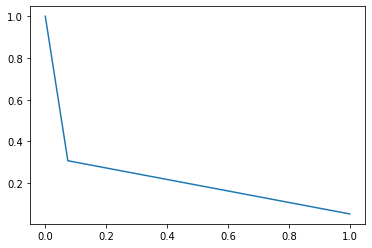

In [17]:
from sklearn.metrics import average_precision_score, precision_recall_curve

#Mean average precision
average_precision_lr = average_precision_score(y_test_list, predictions_list)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_lr))

#precision recall score
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_test_list, predictions_list)
plt.plot(recall_lr, precision_lr)
plt.show()

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

mm_pipeline = Pipeline([
        ('mm_scaler', MinMaxScaler()),
    ])

X_train_mmScale = mm_pipeline.fit_transform(X_train)
X_test_mmScale = mm_pipeline.fit_transform(X_test)

# K-nearest neighbour

In [19]:
from sklearn.neighbors import KNeighborsClassifier 
def knn_model(X_train, y_train,X_test, y_test):
  knn = KNeighborsClassifier(n_neighbors = 7)
  knn.fit(X_train, y_train) 
  knn_scores = cross_val_score(knn, X_train, y_train,n_jobs =-1, cv=20)
  print("Cross Validation score:", knn_scores.mean())

  
  knn_predictions = knn.predict(X_test)  
    ## Calculate the performance of the classifier
  accuracy = accuracy_score(y_test,knn_predictions)
  f1 = f1_score(y_test, knn_predictions)
  precision=precision_score(y_test, knn_predictions)
  recall=recall_score(y_test, knn_predictions)
  
  print("Accuracy of K-nearest Neighbor:", accuracy)
  print("Precision score of K-nearest Neighbor:", precision)
  print("recall score of K-nearest Neighbor:", recall)
  print("F1 score of K-nearest Neighbor:", f1)

  return knn_predictions

knn_predictions=knn_model(X_train_mmScale,y_train,X_test_mmScale,y_test) 

Cross Validation score: 0.9530362826375292
Accuracy of K-nearest Neighbor: 0.9481409001956947
Precision score of K-nearest Neighbor: 0.6666666666666666
recall score of K-nearest Neighbor: 0.037037037037037035
F1 score of K-nearest Neighbor: 0.07017543859649122


In [20]:
knn_reg_pred=pd.DataFrame(knn_predictions)
d = {0: 'KNN Regression predictions'}
knn_reg_pred=knn_reg_pred.rename(columns=d)
knn_reg_pred

,KNN Regression predictions
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [21]:
knn_reg_pred['KNN Regression predictions'].value_counts()

0    1019
1       3
Name: KNN Regression predictions, dtype: int64

In [22]:
#converting it into list for eval function
predictions_list_knn=list(knn_predictions)
#Model Evaluation
def model_eval(predict,y):
    tp,tn,fp,fn = 0,0,0,0
    for i in range(len(y)):
        if predict[i] == 1:
            if y[i] == 1:
                tp += 1
            else:
                fp += 1
        else:
            if y[i] == 1:
                fn += 1
            else:
                tn += 1
    
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = (2)*(precision*recall)/(precision+recall)
    print('\tConfusion Matrix')
    print('------------------------------')
    print('\t   Predict')
    print('          "1" |  "0"')
    print('Actual "1"|',tp,   '|',fn)
    print('       "0"|',fp, '|',tn)
    print('------------------------------')
    print('')

    print('accuracy = ', accuracy)
    print('precision = ', precision)
    print('recall = ', recall)
    print('F1 = ',f1)
    print('TRUE POSITIVE = ',tp)
    print('TRUE NEGATIVE = ',tn)
    print('FALSE NEGATIVE = ',fn)
    print('FALSE POSITIVE = ',fp)
model_eval(predictions_list_knn,y_test_list)

	Confusion Matrix
------------------------------
	   Predict
          "1" |  "0"
Actual "1"| 2 | 52
       "0"| 1 | 967
------------------------------

accuracy =  0.9481409001956947
precision =  0.6666666666666666
recall =  0.037037037037037035
F1 =  0.07017543859649122
TRUE POSITIVE =  2
TRUE NEGATIVE =  967
FALSE NEGATIVE =  52
FALSE POSITIVE =  1


Average precision-recall score: 0.08


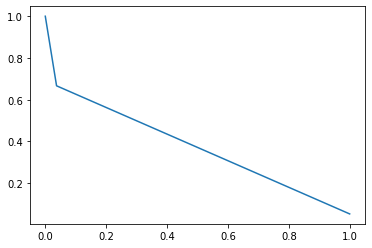

In [23]:
#Mean average precision
average_precision_knn = average_precision_score(y_test_list, predictions_list_knn)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_knn))

#precision recall score
precision_knn, recall_knn, thresholds_knn = precision_recall_curve(y_test_list, predictions_list_knn)
plt.plot(recall_knn, precision_knn)
plt.show()

# Naive Bayes

In [24]:
from sklearn.naive_bayes import BernoulliNB
def Bnb_model(X_train, y_train,X_test, y_test):
    bnb = BernoulliNB(alpha=0.01, binarize=0.0)
    bnb_scores = cross_val_score(bnb, X_train, y_train,n_jobs =-1, cv=20)
    print("Cross Validation score:", bnb_scores.mean())
    bnb.fit(X_train, y_train) 
    bnb_predictions = bnb.predict(X_test) 

    ## Calculate the performance of the classifier
    accuracy = accuracy_score(y_test,bnb_predictions)
    f1 = f1_score(y_test, bnb_predictions)
    precision=precision_score(y_test, bnb_predictions)
    recall=recall_score(y_test, bnb_predictions)
    

    print("Accuracy of Naive Bayes:", accuracy)
    print("Precision score of Naive Bayes:", precision)
    print("recall score of Naive Bayes:", recall)
    print("F1 score of Naive Bayes:", f1)
    
    return bnb_predictions

bnb_predictions=Bnb_model(X_train,y_train,X_test,y_test)

Cross Validation score: 0.9425184817408878
Accuracy of Naive Bayes: 0.9393346379647749
Precision score of Naive Bayes: 0.1
recall score of Naive Bayes: 0.018518518518518517
F1 score of Naive Bayes: 0.03125


In [25]:
nb_reg_pred=pd.DataFrame(bnb_predictions)
d = {0: 'Naive Bayes Regression predictions'}
nb_reg_pred=nb_reg_pred.rename(columns=d)
nb_reg_pred

,Naive Bayes Regression predictions
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [26]:
nb_reg_pred['Naive Bayes Regression predictions'].value_counts()

0    1012
1      10
Name: Naive Bayes Regression predictions, dtype: int64

In [27]:
#converting it into list for eval function
predictions_list_nb=list(bnb_predictions)
#Model Evaluation
def model_eval(predict,y):
    tp,tn,fp,fn = 0,0,0,0
    for i in range(len(y)):
        if predict[i] == 1:
            if y[i] == 1:
                tp += 1
            else:
                fp += 1
        else:
            if y[i] == 1:
                fn += 1
            else:
                tn += 1
    
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = (2)*(precision*recall)/(precision+recall)
    print('\tConfusion Matrix')
    print('------------------------------')
    print('\t   Predict')
    print('          "1" |  "0"')
    print('Actual "1"|',tp,   '|',fn)
    print('       "0"|',fp, '|',tn)
    print('------------------------------')
    print('')

    print('accuracy = ', accuracy)
    print('precision = ', precision)
    print('recall = ', recall)
    print('F1 = ',f1)
    print('TRUE POSITIVE = ',tp)
    print('TRUE NEGATIVE = ',tn)
    print('FALSE NEGATIVE = ',fn)
    print('FALSE POSITIVE = ',fp)
model_eval(predictions_list_nb,y_test_list)

	Confusion Matrix
------------------------------
	   Predict
          "1" |  "0"
Actual "1"| 1 | 53
       "0"| 9 | 959
------------------------------

accuracy =  0.9393346379647749
precision =  0.1
recall =  0.018518518518518517
F1 =  0.03125
TRUE POSITIVE =  1
TRUE NEGATIVE =  959
FALSE NEGATIVE =  53
FALSE POSITIVE =  9


Average precision-recall score: 0.05


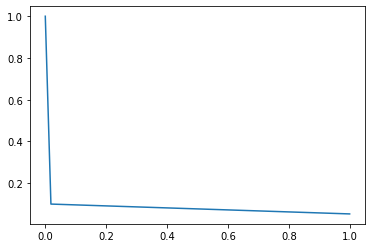

In [28]:
#Mean average precision
average_precision_nb = average_precision_score(y_test_list, predictions_list_nb)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_nb))

#precision recall score
precision_nb, recall_nb, thresholds_nb = precision_recall_curve(y_test_list, predictions_list_nb)
plt.plot(recall_nb, precision_nb)
plt.show()